Part (a) Write a computer program which computes the LASSO solution path (for all lambda in a given range) by implementing the cyclic coordinate descent equations derived in lecture, and the speedup due to pre-computation suggested immediately thereafter in the lecture notes. 

Part (b) Consider a linear model with known coefficients, such as

y =3 x_1 − 17 x_2 + 5 x_3 + epsilon,  where epsilon ∼ N(0, 1)


In [ ]:
! pip install mahotas

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl

import mahotas



In [3]:
number=100
num_beta=3
x=np.random.normal(size = (number,num_beta))
epsilon=np.random.normal(size=(100))
y=3*x[:,0]-17*x[:,1]+5*x[:,2]+epsilon


In [4]:


def Lasso(x,y,lamda,beta_0=0):
    
    row,col=x.shape
    beta=np.ones((col))
    for i in range(200):
        for j in range(col):
            x_j=x[:,j]
            x_j_2=np.linalg.norm(x_j)**2
            z_jx_j=y.dot(x_j)-beta_0*(np.ones((row,1)).T.dot(x_j))
            sum_beta_xk_xj=0
            for k in range(col):
                if k!=j:
                    x_k=x[:,k]
                    x_kx_j=x_k.T.dot(x_j)
                    z_jx_j-=beta[k]*x_kx_j
                    sum_beta_xk_xj+=beta[k]*np.mean(x_k)
            beta_hat=z_jx_j/x_j_2
            gamma=row*lamda/x_j_2
            beta[j]=mahotas.thresholding.soft_threshold(beta_hat,gamma)
            
            beta_0=np.mean(y)-sum_beta_xk_xj-beta[j]*np.mean(x_j)
            
                    
        
    return beta_0,beta
            
            
            

In [5]:
Lasso(x,y,0.1)

(-0.09544190368517678, array([  2.93640105, -16.92843132,   4.80282454]))

In [6]:
lamda=np.arange(0,20,0.1).tolist()
beta_0=[]
beta_1=[]
beta_2=[]
beta_3=[]
for lam in lamda:
    temp1,temp2=Lasso(x,y,lam)
    beta_0.append(temp1)
    beta_1.append(temp2[0])
    beta_2.append(temp2[1])
    beta_3.append(temp2[2])


<ipython-input-7-43322ef5ea7b>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(lamda),beta_0)
<ipython-input-7-43322ef5ea7b>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(lamda),beta_1)
<ipython-input-7-43322ef5ea7b>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(lamda),beta_2)
<ipython-input-7-43322ef5ea7b>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(lamda),beta_3)


Text(0.5, 0, 'log(lamda)')

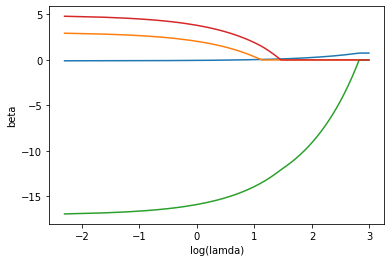

In [7]:
plt.plot(np.log(lamda),beta_0)    
plt.plot(np.log(lamda),beta_1)
plt.plot(np.log(lamda),beta_2)
plt.plot(np.log(lamda),beta_3)
plt.ylabel('beta')
plt.xlabel("log(lamda)")


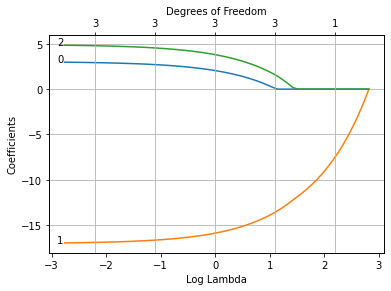

{'fig': <Figure size 432x288 with 2 Axes>,
 'ax1': <matplotlib.axes._subplots.AxesSubplot at 0x7fec3f0e78e0>,
 'ax2': <matplotlib.axes._subplots.AxesSubplot at 0x7fec3eae4e20>}

In [8]:
import glmnet_python
from glmnet import glmnet
from glmnetPrint import glmnetPrint
from glmnetCoef import glmnetCoef
from glmnetPlot import glmnetPlot
fit = glmnet(x = x,y = y, family = 'gaussian', alpha = 1, standardize = False)
glmnetPlot(fit, xvar = 'lambda', label = True,)